In [1]:
# -*- coding:utf-8 -*-
%matplotlib inline
import csv
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
path = u'/home/xuehaozhe/文档/机器学习升级版/4.代码/4.iris.data'  # 数据文件路径

In [3]:
## 手写读取数据
f = file(path)
x = []
y = []
for d in f:
    print d    

5.1,3.5,1.4,0.2,Iris-setosa

4.9,3.0,1.4,0.2,Iris-setosa

4.7,3.2,1.3,0.2,Iris-setosa

4.6,3.1,1.5,0.2,Iris-setosa

5.0,3.6,1.4,0.2,Iris-setosa

5.4,3.9,1.7,0.4,Iris-setosa

4.6,3.4,1.4,0.3,Iris-setosa

5.0,3.4,1.5,0.2,Iris-setosa

4.4,2.9,1.4,0.2,Iris-setosa

4.9,3.1,1.5,0.1,Iris-setosa

5.4,3.7,1.5,0.2,Iris-setosa

4.8,3.4,1.6,0.2,Iris-setosa

4.8,3.0,1.4,0.1,Iris-setosa

4.3,3.0,1.1,0.1,Iris-setosa

5.8,4.0,1.2,0.2,Iris-setosa

5.7,4.4,1.5,0.4,Iris-setosa

5.4,3.9,1.3,0.4,Iris-setosa

5.1,3.5,1.4,0.3,Iris-setosa

5.7,3.8,1.7,0.3,Iris-setosa

5.1,3.8,1.5,0.3,Iris-setosa

5.4,3.4,1.7,0.2,Iris-setosa

5.1,3.7,1.5,0.4,Iris-setosa

4.6,3.6,1.0,0.2,Iris-setosa

5.1,3.3,1.7,0.5,Iris-setosa

4.8,3.4,1.9,0.2,Iris-setosa

5.0,3.0,1.6,0.2,Iris-setosa

5.0,3.4,1.6,0.4,Iris-setosa

5.2,3.5,1.5,0.2,Iris-setosa

5.2,3.4,1.4,0.2,Iris-setosa

4.7,3.2,1.6,0.2,Iris-setosa

4.8,3.1,1.6,0.2,Iris-setosa

5.4,3.4,1.5,0.4,Iris-setosa

5.2,4.1,1.5,0.1,Iris-setosa

5.5,4.2,1.4,0.2,Iris-setosa

4.9,3.1,1.5,0.

In [4]:
## 手写读取数据
f = file(path)
x = []
y = []
for d in f:
    # print d
    d = d.strip()
    if d:
        d = d.split(',')
        #print d
        y.append(d[-1])
        x.append(map(float,d[:-1]))
        # print map(float,d[:-1])
print '原始数据x：\n',x
print '原始数据y：\n',y

原始数据x：
[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4

In [5]:
x = np.array(x)
print 'Numpy格式X:\n',x

y = np.array(y)
print 'Numpy格式Y - 1:\n',y


Numpy格式X:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 

In [6]:
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
print 'Numpy格式Y - 2:\n',y


Numpy格式Y - 2:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2']


In [7]:
y = y.astype(dtype = np.int)
print 'Numpy格式Y - 3:\n',y

Numpy格式Y - 3:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 使用sklearn的数据预处理

In [9]:
import pandas as pd
df = pd.read_csv(path)
x = df.values[:,:-1] #所有行  列除了最后一列 
y = df.values[:,-1]
print x
print y

[[4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.

In [10]:
from sklearn import preprocessing

In [11]:
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
print le.classes_
y = le.transform(y)
print y

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


### 数据预处理 正式版本

In [12]:
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s] ##返回字典的编号

# 路径，浮点型数据，逗号分隔，第4列使用函数iris_type单独处理
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
print data

[[ 5.1  3.5  1.4  0.2  0. ]
 [ 4.9  3.   1.4  0.2  0. ]
 [ 4.7  3.2  1.3  0.2  0. ]
 [ 4.6  3.1  1.5  0.2  0. ]
 [ 5.   3.6  1.4  0.2  0. ]
 [ 5.4  3.9  1.7  0.4  0. ]
 [ 4.6  3.4  1.4  0.3  0. ]
 [ 5.   3.4  1.5  0.2  0. ]
 [ 4.4  2.9  1.4  0.2  0. ]
 [ 4.9  3.1  1.5  0.1  0. ]
 [ 5.4  3.7  1.5  0.2  0. ]
 [ 4.8  3.4  1.6  0.2  0. ]
 [ 4.8  3.   1.4  0.1  0. ]
 [ 4.3  3.   1.1  0.1  0. ]
 [ 5.8  4.   1.2  0.2  0. ]
 [ 5.7  4.4  1.5  0.4  0. ]
 [ 5.4  3.9  1.3  0.4  0. ]
 [ 5.1  3.5  1.4  0.3  0. ]
 [ 5.7  3.8  1.7  0.3  0. ]
 [ 5.1  3.8  1.5  0.3  0. ]
 [ 5.4  3.4  1.7  0.2  0. ]
 [ 5.1  3.7  1.5  0.4  0. ]
 [ 4.6  3.6  1.   0.2  0. ]
 [ 5.1  3.3  1.7  0.5  0. ]
 [ 4.8  3.4  1.9  0.2  0. ]
 [ 5.   3.   1.6  0.2  0. ]
 [ 5.   3.4  1.6  0.4  0. ]
 [ 5.2  3.5  1.5  0.2  0. ]
 [ 5.2  3.4  1.4  0.2  0. ]
 [ 4.7  3.2  1.6  0.2  0. ]
 [ 4.8  3.1  1.6  0.2  0. ]
 [ 5.4  3.4  1.5  0.4  0. ]
 [ 5.2  4.1  1.5  0.1  0. ]
 [ 5.5  4.2  1.4  0.2  0. ]
 [ 4.9  3.1  1.5  0.1  0. ]
 [ 5.   3.2  1.2  0.

In [13]:
# 将数据的0到3列组成x，第4列得到y
x, y = np.split(data, (4,), axis=1)   # axis=1 按列
print x
print y

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [14]:
# 为了可视化，仅使用前两列特征
x = x[:, :2] #取所有的行 前两列

In [15]:
print x

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

In [17]:
print y.ravel() # 平坦化数组  

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]


In [18]:
logreg = LogisticRegression()   # Logistic回归模型
logreg.fit(x, y.ravel())        # 根据数据[x,y]，计算回归参数

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 画图

In [19]:
#使用numpy.linspace方法
#例如，在从1到3中产生9个数：
print np.linspace(1,3,9)

[ 1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.  ]


In [20]:
 # 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)        # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

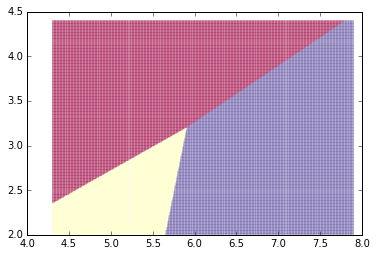

In [38]:
y_hat = logreg.predict(x_test)          # 预测值
y_hat = y_hat.reshape(x1.shape)         # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.Spectral, alpha=0.1)  # 预测值的显示Paired/Spectral/coolwarm/summer/spring/OrRd/Oranges


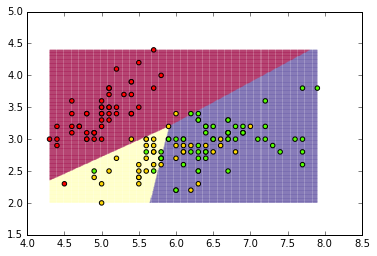

In [39]:
y_hat = logreg.predict(x_test)          # 预测值
y_hat = y_hat.reshape(x1.shape)         # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.Spectral, alpha=0.1)  # 预测值的显示Paired/Spectral/coolwarm/summer/spring/OrRd/Oranges

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.prism)  # 样本的显示


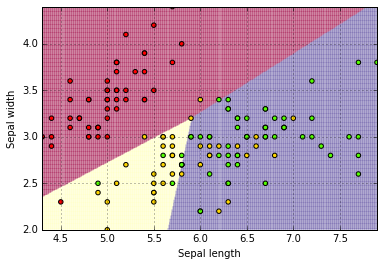

In [40]:
y_hat = logreg.predict(x_test)          # 预测值
y_hat = y_hat.reshape(x1.shape)         # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.Spectral, alpha=0.1)  # 预测值的显示Paired/Spectral/coolwarm/summer/spring/OrRd/Oranges

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.prism)  # 样本的显示

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()

In [43]:
# 训练集上的预测结果
y_hat = logreg.predict(x)
y = y.reshape(-1)       # 此转置仅仅为了print时能够集中显示
result = (y_hat == y)   # True则预测正确，False则预测错误
print result
c = np.count_nonzero(result)    # 统计预测正确的个数
print c
print 'Accuracy: %.2f%%' % (100 * float(c) / float(len(result)))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False  True False  True False  True False  True
  True False False False  True False  True False False  True  True False
 False False False False False False False  True  True  True False False
 False False False False  True  True  True False False  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True]
115
Accuracy: 76.67%


In [45]:
print y_hat
print y

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  2.  2.  2.  1.  2.  1.  2.  2.  1.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  2.  2.  0.  0.  2.  2.  1.  1.
  1.  2.  2.  1.  1.  1.  1.  2.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  0.  2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. 

### 标准化版本

In [46]:
from sklearn.preprocessing import StandardScaler ## 均值变成0  方差 变成1

In [47]:
x = StandardScaler().fit_transform(x)

In [48]:
x

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

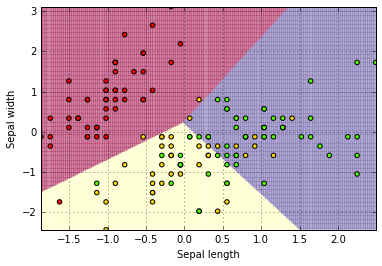

(150,)
(150,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  1.  1.  2.  1.  2.  1.  1.  1.  1.  2.  1.
  1.  1.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  0.  0.  2.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  2.  1.  2.  2.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  1.  2.  1.  2.  1.  2.  2.
  1.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  1.  2.
  2.  2.  1.  2.  2.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1

In [50]:
logreg = LogisticRegression()
logreg.fit(x,y.ravel())


# 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

    # # 无意义，只是为了凑另外两个维度
    # x3 = np.ones(x1.size) * np.average(x[:, 2])
    # x4 = np.ones(x1.size) * np.average(x[:, 3])
    # x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

y_hat = logreg.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.Spectral, alpha=0.1)  # 预测值的显示Paired/Spectral/coolwarm/summer/spring/OrRd/Oranges
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.prism)  # 样本的显示
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()

    # 训练集上的预测结果
y_hat = logreg.predict(x)
y = y.reshape(-1)       # 此转置仅仅为了print时能够集中显示
print y_hat.shape       # 不妨显示下y_hat的形状
print y.shape
result = (y_hat == y)   # True则预测正确，False则预测错误
print y_hat
print y
print result
c = np.count_nonzero(result)    # 统计预测正确的个数
print c
print 'Accuracy: %.2f%%' % (100 * float(c) / float(len(result)))
